# Въведение

## Игра на бурито

[https://www.gurobi.com/burrito-optimization-game/](https://www.gurobi.com/burrito-optimization-game/)


## Берлинският въздушен мост

След края на Втората световна война Германия е разделена на четири окупационни
зони: Американска, Британска, Френска и Съветска. Берлин също така е разделен на
четири зони, но достъпът до него по суша и по вода минава изцяло през територията на Съветската окупационна зона.


![Окупационни зони в Германия след Втората световна война. Източник: Wikipedia.](https://upload.wikimedia.org/wikipedia/commons/thumb/a/a8/Deutschland_Besatzungszonen_8_Jun_1947_-_22_Apr_1949.svg/800px-Deutschland_Besatzungszonen_8_Jun_1947_-_22_Apr_1949.svg.png)

На 24-ти юни 1948 Съветският Съюз
[блокира](https://en.wikipedia.org/wiki/Berlin_Blockade) достъпа до Западен
Берлин, с което започва една от най-значимите конфронтации по време на 
Студената война. Без достъп по суша или вода, западните съюзници започват да 
снабдяват града по въздух (Берлински въздушен мост).

![Разтоварване на сол (река Хавел). Източник: Wikipedia.](https://upload.wikimedia.org/wikipedia/commons/1/10/Sunderland_201_Sqn_on_Havel_during_Berlin_Airlift_1948.jpg)

![Приземяване на C-54 (Летище Темпелхоф). Източник: Wikipedia.](https://upload.wikimedia.org/wikipedia/commons/d/d8/C-54landingattemplehof.jpg)

## Описание на проблема

За по-просто нека да приемем, че доставките до Берлин се извършват с 
два вида самолети: американски, които могат да поемат до 30 000 кубични фута товар ($\approx 849 m^3$),
и британски самолети с капацитет до 20 000 кубични фута ($\approx 566 m^3$).

Поради ограничения в инфраструктурата на ден могат да летят най-много 48 самолета
(независимо от кой вид).

За всеки полет на американски самолет има нужда от 
16 души персонал, двойно повече от броя нужен за британските самолети. 
Общо на разположение са 512 души на ден.


Разходите за гориво и поддръжка на самолетите възлизат на 9000 долара за полет
на американски самолет и на 5000 долара за полет на британски самолет.
Поради бюджетни ограничения общите разходи не могат да надхвърлят 300 000
долара.

Колко британски и колко американски самолети да използва на ден въздушният мост,
така че да достави до Берлин възможно най-голямо количество стоки?


## Математически модел

- Избор на променливи

:::{.callout .info .collapsed="true"}
$$
\begin{align}
x_1: \text{ брой американски самолети}\\
x_2: \text{ брой британски самолети}
\end{align}
$$
:::

$$
\begin{align*}
\max z(x_1, x_2) = 3 x_1 + 2 x_2 \text{ (общ товар, целева функция, objective)} \\
 x_1 + x_2 \leq 48 \text{ (инфраструктура)} \\
  16 x_1 + 8 x_2 \leq 512 \text{ (персонал)} \\
  9 x_1 + 5 x_2 \leq 300 \text{ (бюджет)} \\
  x_1  \geq 0 \text{ (брой американски самолети)} \\
  x_2 \geq 0 \text{ (брой британски самолети)}
\end{align*}
$$


Преди да решим задачата, нека да я решим неформално в опростен вариант, като игнорираме второто и третото ограничение:


$$
\begin{align*}
\max 3 x_1 + 2 x_2 \\
x_1 + x_2 \leq 48 \\
x_1 \geq 0 \\
x_2 \geq 0
\end{align*}
$$

Решение: 

$$
(x^*_1 = 48, x^*_2 = 0)
$$

## Допустимо множество

За да решим задачата (и с трите ограничения) първо ще представим допустимото множество графично, като за целта ще начертаем правите към всяко от петте ограничения (включително ограниченията за неотрицателност). За да можем да начертаем правите са ни нужни по две точки от всяка права. Най-лесно можем да намерим пресечните им точки с двете оси ($x_1$ и $x_2$).

За всички точки на оста $x_2$ е изпълнено, че $x_1 = 0$. Когато заместим с $x_1 = 0$  в уравнението на всяка от правите ще намерим пресечните им точки с оста $x_2$. За всички точки от оста $x_1$ важи, че $x_2 = 0$, така че когато заместим с $x_2 = 0$ в уравненията на правите ще получим пресечните им точки с оста $x_1$.


Права на първото ограничение (инфраструктура):

$$
x_1 + x_2 = 48
$$
За да намерим пресечните точки на правата (инфраструктура) с двете оси:

- При $x_1 = 0$ на колко е равно $x_2$? $0 + x_2 = 48$
- При $x_2 = 0$ на колко е равно $x_1$? $x_1 + 0 = 48$

За да намерим пресечните точки на втората права (персонал) с двете оси:

$$
16 x_1 + 8 x_2 = 512
$$

- При $x_1 = 0$ на колко е равно $x_2$? $16 \cdot 0 + 8x_2 = 512 \implies x_2 = 512 / 8 = 64$
- При $x_2 = 0$ на колко е равно $x_1$? $16 x_1 +8 \cdot 0 = 512 \implies x_1 = 512 / 16 = 32$


По същия начин можем да намерим и две точки от правата на третото ограничение (бюджет): 
(0, 300 / 5) и (300 / 9, 0).

In [1]:
import polytope as pc
import numpy as np

A = np.array([[1, 1], [16, 8], [9, 5], [-1, 0], [0, -1]])
b = np.array([48, 512, 300, 0, 0])

P = pc.Polytope(A, b)
P_extr = pc.extreme(P)

P_extr

`polytope` failed to import `cvxopt.glpk`.
will use `scipy.optimize.linprog`


array([[32., -0.],
       [20., 24.],
       [15., 33.],
       [-0., 48.],
       [-0., -0.]])

Допустимото множество се състои от всички точки в полигона (0, 0), (32, 0), (20, 24), (15, 33), (0, 48). Изчислението на пресечните точки (20, 24) и (15, 33).

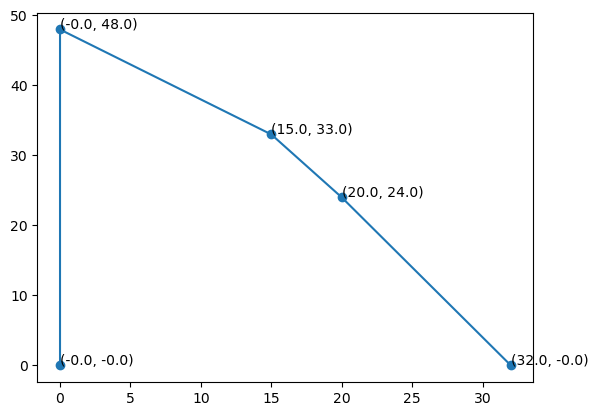

In [2]:
from matplotlib import pyplot as plt

plt.plot(P_extr[:, 0], P_extr[:, 1], '-o')

for i, p in enumerate(P_extr):
    plt.text(p[0], p[1], f"({p[0]:0.1f}, {p[1]:0.1f})")


In [3]:
def z(x1, x2):
    return 3 * x1 + 2 * x2

# (0, 0)
print("z(0, 0) = ", z(0, 0))

# (32, 0)
print("z(32, 0) = ", z(32, 0))

# (20, 24)
print("z(20, 24) = ", z(20, 24))

# (15, 33)
print("z(15, 33) = ", z(15, 33))

# (0, 48)
print("z(0, 48) = ", z(0, 48))

z(0, 0) =  0
z(32, 0) =  96
z(20, 24) =  108
z(15, 33) =  111
z(0, 48) =  96


Оптималната комбинация от американски и британски самолети е 
$(x^*_1 = 15, x^*_2 = 33)$. Това е възможно най-големият товар, който могат да пренесат самолетите при дадените ограничения. 
Този товар е равен на $30000 $x^*_{1} + 20000 x^*_{2} = 30000 \cdot 15 + 20000 \cdot 33 = 1 110 000$ кубични фута, използвайки 15 американски и 33 британски самолета.

## Проблем с настоящия подход

В момента решихме задачата, като изчислихме върховете на допустимото множество и пресметнахме целевата функция във всеки от тях. Решението на максимизационната задача беше върхът с най-висока стойност на целевата функция.

За съжаление този подход е приложим само за много малки задачи и няма практическа стойност. Причината за това е, че броят на върховете на допустимото множество нараства много бързо с увеличаване на броя на ограниченията и променливите. Горна граница за броя на върховете на допустимото множество е дадена от биномния коефициент:

 $$
 \binom{n}{k} = \frac{n!}{k!(n-k)!}
 $$

 където $n$ е броят на променливите, а $k$ е броят на ограниченията. Можем да пресметнем горната граница за броя на върховете на допустимото за различни комбинации на $n$ и $k$:

In [4]:
from scipy.special import comb

print("n = 2, k = 2, Максимален брой върхове = ", comb(2, 2))
print("n = 2, k = 3, Максимален брой върхове = ", comb(3, 2))
print("n = 20, k = 15, Максимален брой върхове = ", comb(20, 15))
print("n = 40, k = 25, Максимален брой върхове = ", comb(40, 25))
print("n = 50, k = 25, Максимален брой върхове = ", comb(50, 25))

n = 2, k = 2, Максимален брой върхове =  1.0
n = 2, k = 3, Максимален брой върхове =  3.0
n = 20, k = 15, Максимален брой върхове =  15504.0
n = 40, k = 25, Максимален брой върхове =  40225345056.0
n = 50, k = 25, Максимален брой върхове =  126410606437752.05


Изчисляването на целевата функция за всички върхове е непостижимо дори за модерни компютри. Ако приемем, че компютърът може да обработи 1 милиард върха на секунда, за 80 променливи и 40 ограничения ще му трябва много време:

In [5]:
comb_n = comb(80, 45)
print(round(comb_n / (1e9 * 60 * 60 * 24 * 365), 1), "години")

1836016.6 години


## Решение на модела в Excel

[Решение на модела в Excel](https://github.com/febse/data/raw/main/opt/Berlin-Air-Example.xlsx)

## Решение на модела с gurobipy


In [ ]:
import gurobipy as gp
from gurobipy import GRB

# Съставяне на нов модел

m = gp.Model("Berlin Airlift")

x1 = m.addVar(vtype=GRB.INTEGER, lb = 0, name="American")
x2 = m.addVar(vtype=GRB.INTEGER, lb = 0, name="British")

# Целева функция

m.setObjective(3 * x1 + 2 * x2, GRB.MAXIMIZE)

# Добавяне на ограниченията

m.addConstr(x1 + x2 <= 48, "Infrastructure")
m.addConstr(16 * x1 + 8 * x2 <= 512, "Staff")
m.addConstr(9 * x1 + 5 * x2 <= 300, "Budget")

# Неотрицателността на променливите е автоматично дефинирана в m.addVar

# Решаване на модела
m.optimize()

# Отпечатване на резултата
for v in m.getVars():
    print(f"{v.varName}: {v.x}")
